In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [17]:
import pandas as pd

df = pd.read_csv(r"D:\Oasis Data Internship\users_data.csv")
df.head()


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [18]:
print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns)

df.info()


Dataset Shape: (2000, 14)

Columns:
Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-nu

In [19]:
# Check missing values
df.isnull().sum()
# Fill numeric missing values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

df.isnull().sum()


id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [20]:
features = df.select_dtypes(include=np.number)
features.head()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


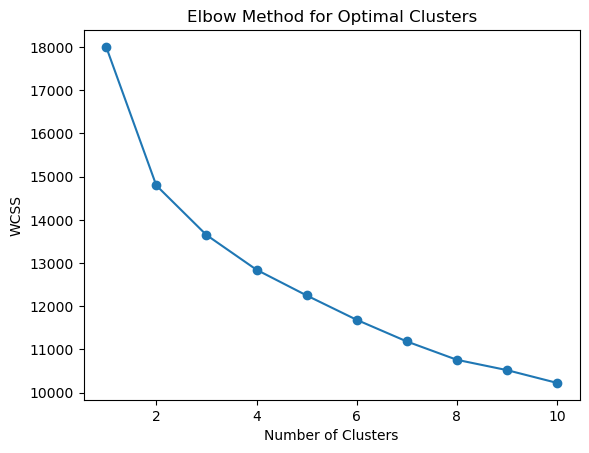

In [21]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


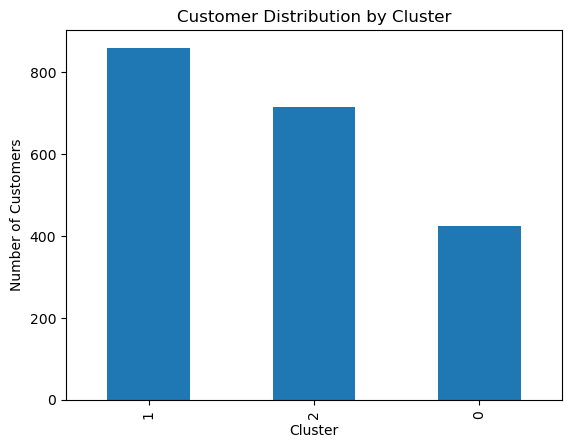

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df.head()
df['Cluster'].value_counts().plot(kind='bar')
plt.title("Customer Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


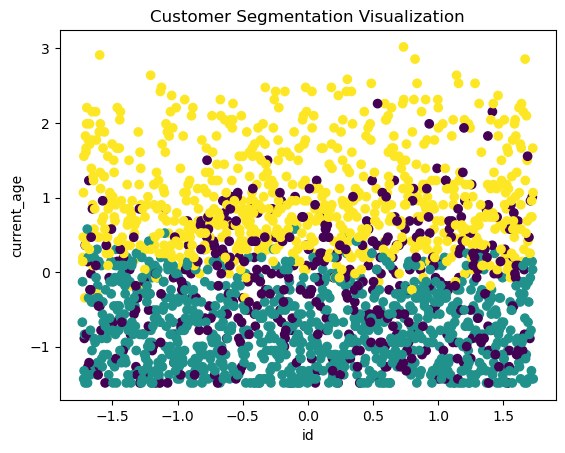

In [23]:
plt.scatter(
    scaled_features[:, 0],
    scaled_features[:, 1],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title("Customer Segmentation Visualization")
plt.show()


df.groupby('Cluster').mean()
### 🔍 Key Insights

- Customers were segmented into three distinct groups using K-Means clustering.
- Each cluster shows different behavioral or demographic characteristics.
- These segments can be used for targeted marketing and personalized strategies.


### ✅ Conclusion

Customer segmentation using K-Means helped identify distinct groups within the
user dataset. This approach can assist businesses in understanding user behavior
and designing targeted engagement strategies.
